### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

print(tienda.head())
print(tienda2.head())
print(tienda3.head())
print(tienda4.head())


            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de crédito                   8   4.60971 -74.08175  
1  Tarjeta de crédito   

#1. Análisis de facturación



In [2]:
# Agregar columna identificadora a cada DataFrame
tienda['tienda'] = 'tienda'
tienda2['tienda'] = 'tienda2'
tienda3['tienda'] = 'tienda3'
tienda4['tienda'] = 'tienda4'

# Unir todos los DataFrames en uno solo
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Visualizar primeras filas del DataFrame conjunto
print(tiendas.head())


            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon  tienda  
0  Tarjeta de crédito                   8   4.60971 -74.08175  tienda  
1  Tarje

In [3]:
# Lista con los nombres únicos de cada tienda
nombres_tiendas = tiendas['tienda'].unique()

# Lista vacía para guardar los ingresos
ingresos_totales = []

# Calcular ingreso total por tienda
for nombre in nombres_tiendas:
    ingreso = tiendas[tiendas['tienda'] == nombre]['Precio'].sum()
    ingresos_totales.append(ingreso)

# Crear DataFrame resumen con los resultados
ingresos_df = pd.DataFrame({
    'Tienda': nombres_tiendas,
    'Ingreso Total': ingresos_totales
})

# Formatear la columna 'Ingreso Total' como peso
ingresos_df['Ingreso Total'] = ingresos_df['Ingreso Total'].map('${:,.2f}'.format)

print(ingresos_df)

    Tienda      Ingreso Total
0   tienda  $1,150,880,400.00
1  tienda2  $1,116,343,500.00
2  tienda3  $1,098,019,600.00
3  tienda4  $1,038,375,700.00


# 2. Ventas por categoría

In [8]:
# Agrupar y contar productos por categoría en cada tienda
ventas_categoria = tiendas.groupby(['tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad Vendida')

# Ordenar para ver las más populares primero en cada tienda
top_categorias = ventas_categoria.sort_values(['tienda', 'Cantidad Vendida'], ascending=[True, False])

from IPython.display import display

display(top_categorias)

,tienda,Categoría del Producto,Cantidad Vendida
7,tienda,Muebles,465
3,tienda,Electrónicos,448
5,tienda,Juguetes,324
2,tienda,Electrodomésticos,312
1,tienda,Deportes y diversión,284
4,tienda,Instrumentos musicales,182
6,tienda,Libros,173
0,tienda,Artículos para el hogar,171
15,tienda2,Muebles,442
11,tienda2,Electrónicos,422


# 3. Calificación promedio de la tienda


In [12]:
# Agrupar por 'tienda' y calcular el promedio de 'Calificación'
calificacion_promedio = tiendas.groupby('tienda')['Calificación'].mean().reset_index()

# Renombrar la columna para mayor claridad
calificacion_promedio = calificacion_promedio.rename(columns={'Calificación': 'Calificación Promedio'})

# Mostrar los resultados
print(calificacion_promedio)


    tienda  Calificación Promedio
0   tienda               3.976685
1  tienda2               4.037304
2  tienda3               4.048326
3  tienda4               3.995759


# 4. Productos más y menos vendidos

In [18]:
import pandas as pd
from IPython.display import display

# Verificamos que existan las columnas necesarias
if 'Producto' in tiendas.columns and 'tienda' in tiendas.columns:
    # Lista para guardar los resultados
    resumen_productos = []

    # Obtener todas las tiendas
    tiendas_unicas = tiendas['tienda'].unique()

    # Recorrer cada tienda y calcular el producto más y menos vendido
    for t in tiendas_unicas:
        subset = tiendas[tiendas['tienda'] == t]
        ventas_por_producto = subset['Producto'].value_counts()
        producto_mas_vendido = ventas_por_producto.idxmax()
        cantidad_mas_vendido = ventas_por_producto.max()
        producto_menos_vendido = ventas_por_producto.idxmin()
        cantidad_menos_vendido = ventas_por_producto.min()

        resumen_productos.append({
            'Tienda': t,
            'Producto Más Vendido': producto_mas_vendido,
            'Cantidad Vendida (Más)': cantidad_mas_vendido,
            'Producto Menos Vendido': producto_menos_vendido,
            'Cantidad Vendida (Menos)': cantidad_menos_vendido
        })

    # Crear DataFrame resumen
    productos_df = pd.DataFrame(resumen_productos)

else:
    productos_df = pd.DataFrame({'Mensaje': ['No se encontraron las columnas necesarias en el DataFrame "tiendas".']})

# Mostrar resultado
display(productos_df)


,Tienda,Producto Más Vendido,Cantidad Vendida (Más),Producto Menos Vendido,Cantidad Vendida (Menos)
0,tienda,Microondas,60,Auriculares con micrófono,33
1,tienda2,Iniciando en programación,65,Juego de mesa,32
2,tienda3,Kit de bancas,57,Bloques de construcción,35
3,tienda4,Cama box,62,Guitarra eléctrica,33


# 5. Envío promedio por tienda

In [20]:
# Calcular el costo de envío promedio por tienda (si las columnas existen)
if 'Costo de envío' in tiendas.columns and 'tienda' in tiendas.columns:
    envio_promedio = tiendas.groupby('tienda')['Costo de envío'].mean().reset_index(name='Costo Envío Promedio')
else:
    envio_promedio = pd.DataFrame({'Mensaje': ['No se encontraron las columnas necesarias en el DataFrame "tiendas".']})

# Mostrar resultado
display(envio_promedio)

,tienda,Costo Envío Promedio
0,tienda,26018.609580
1,tienda2,25216.235693
2,tienda3,24805.680373
3,tienda4,23459.457167


6. Visualización

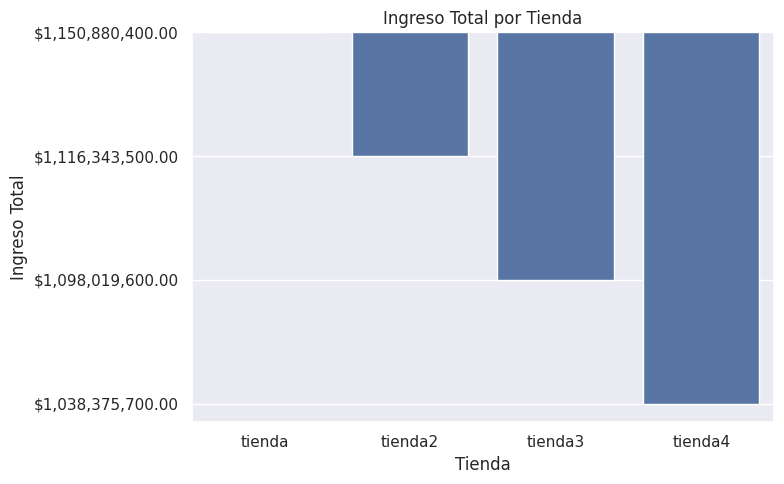

<ipython-input-23-2bb880cfe72d>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='tienda', y='Calificación', data=tiendas, estimator=np.mean, ci=None)


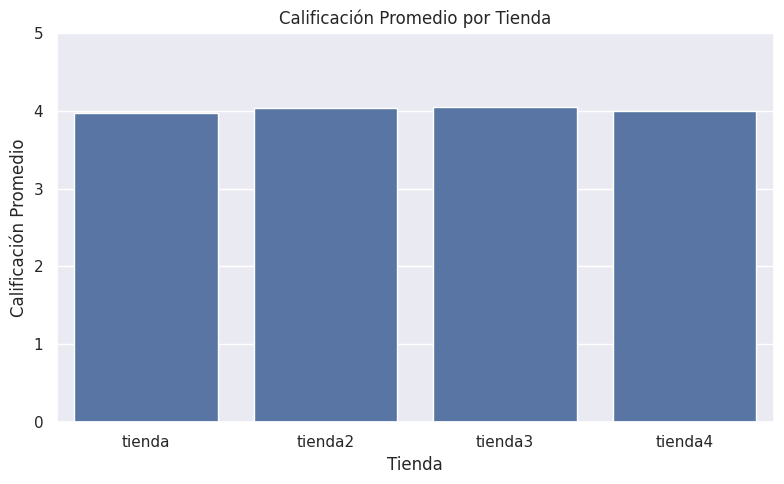

<Figure size 1000x600 with 0 Axes>

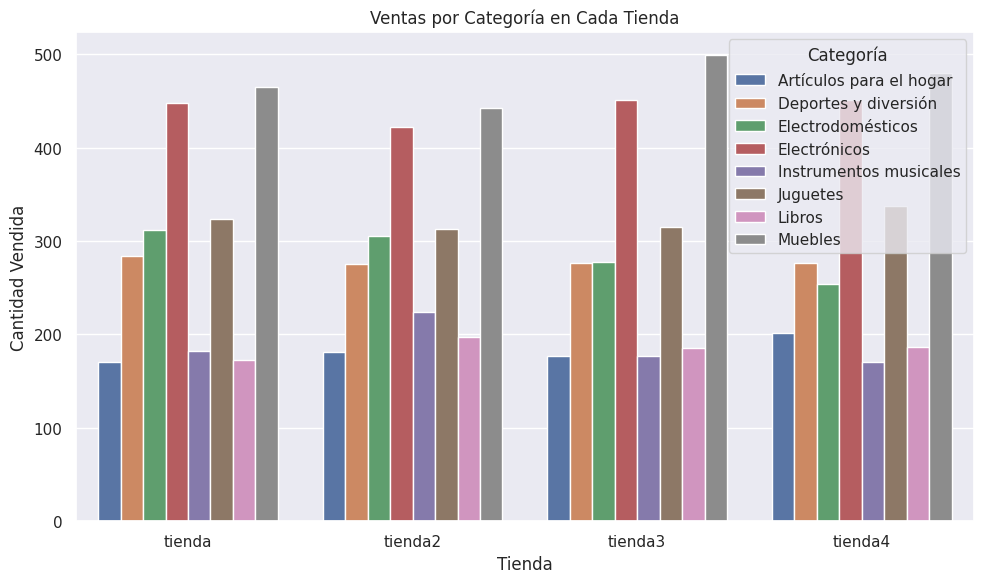

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

# Estilo gráfico
plt.style.use("ggplot")
sns.set_theme()

# Visualización 1: Ingreso Total por Tienda
plt.figure(figsize=(8, 5))
sns.barplot(x='Tienda', y='Ingreso Total', data=ingresos_df)
plt.title("Ingreso Total por Tienda")
plt.ylabel("Ingreso Total")
plt.xlabel("Tienda")
plt.tight_layout()
plt.show()

# Visualización 2: Calificación Promedio por Tienda (con función np.mean)
plt.figure(figsize=(8, 5))
sns.barplot(x='tienda', y='Calificación', data=tiendas, estimator=np.mean, ci=None)
plt.title("Calificación Promedio por Tienda")
plt.ylabel("Calificación Promedio")
plt.xlabel("Tienda")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

# Visualización 3: Categorías más Vendidas por Tienda
plt.figure(figsize=(10, 6))
ventas_categoria = tiendas.groupby(['tienda', 'Categoría del Producto']).size().reset_index(name='Cantidad Vendida')

# Replace 'categoria' with 'Categoría del Producto' in the hue parameter to match the column name
plt.figure(figsize=(10, 6))
sns.barplot(x='tienda', y='Cantidad Vendida', hue='Categoría del Producto', data=ventas_categoria)
plt.title("Ventas por Categoría en Cada Tienda")
plt.ylabel("Cantidad Vendida")
plt.xlabel("Tienda")
plt.legend(title='Categoría')
plt.tight_layout()
plt.show()